<div class="alert alert-block alert-danger">
Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` and that you delete any **raise NotImplementedError()** once you have filled in your code. Enter your student identifier below:

Start by filling in your Name and student ID below. **DO IT NOW**. Save this Jupyter Notebook with the name *MTH786P_surname_ID.ipynb*, where instead of *surname* and *ID* you write your surname and your student ID number.
    
Use the available cells to introduce the code. You can add additional cells if needed.
</div>

<div class="alert alert-block alert-warning">
STUDENT NAME = ""
    
STUDENT ID = ""
</div>

# MTH786U/P assessment template (Sem C, 2020/2021)

This is the coding template for the final project assessment part of MTH786U/P in Semester A of 2020/2021.

The goal of this assessment is to classify fashion images from the [Fashion MNIST database](https://www.kaggle.com/zalando-research/fashionmnist) and to present your results in a written report (at most 8 pages). The assessment is formed of three parts: 1) filling in the missing parts of this Jupyter notebook, 2) applying learned concepts from this notebook and the module MTH786 in general to the Fashion MNIST classification problem, and 3) presenting your results in a written report (written in $\LaTeX$). 

Author: [Mihail Poplavskyi](mailto:m.poplavskyi@qmul.ac.uk),[Martin Benning](mailto:m.benning@qmul.ac.uk)

Date: 16.08.2021

Follow the instructions in this template in order to complete the first part of your assessment. Please only modify cells where you are instructed to do so. Failure to comply may result in unexpected errors that can lead to mark deductions. We load the Numpy and Matplotlib libraries. Please do not add any additional libraries here but at a later stage if required.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#these modules are needed for a visualisation only
import seaborn as sns
import pandas as pd

## Binary logistic regression

For the first part of your final assessment you are required to implement the logistic regression model for binary classification problems as introduced in the lectures. Following up on what you have learned in the lectures and tutorials, complete the following tasks.

Write a function ***logistic_function*** that takes an argument named _inputs_ and returns the output of the $\tanh(x)$ sigmoid function, i.e.

\begin{align*}
    \sigma(x): = \tanh\left(\frac{x}{2}\right) = \frac{\mathrm{e}^{x/2}-\mathrm{e}^{-x/2}}{\mathrm{e}^{x/2}+\mathrm{e}^{-x/2}} \, ,
\end{align*}

applied to the input. Here $x$ is the mathematical notation for the argument _inputs_.

In [2]:
def logistic_function(inputs):
    x = np.exp(inputs/2)
    y = np.exp(-inputs/2)
    sigma_inputs = (x-y)/(x+y)
    return sigma_inputs

Test your function with the following unit tests. Passing this test will be awarded with **2 marks**. Please note that not all unit tests are visible to you.

In [3]:
from numpy.testing import assert_array_almost_equal, assert_array_equal
test_inputs = np.array([[0], [np.log(25)], [-6], [np.log(9)], [2]])
assert_array_almost_equal(logistic_function(test_inputs), np.array([[0], [12/13], [-0.99505475368], \
                            [4/5], [(np.exp(2)-1)/(1 + np.exp(2))]]))

**Binary classification problem with $\tanh(x)$ sigmoid function**  
Before you proceed with the binary classification implementation you may wish to read and digest the following theoretical findings. 

Let us consider a supervised binary logistic regression problem on a training data $\left\{x^{(i)}, y_i\right\}_{i=1}^s$, where for any $i=\overline{1,s}$ one has $x^{(i)}\in\mathbb{R}^d$ and $y_i \in \left\{-1,1\right\}$. One could think of solving classification problems with the same tools that we have used for tackling regression problems, i.e. by introducing the prediction function $f(x;w)$ and then by thresholding the function output. We can define the following probabilities for the events that the output $f(x;w)$ belongs the
class with class label negative one or the class with class label one
$$
\begin{align*}
\rho\left(-1\rvert \mathbf{x},\mathbf{w} \right) &= \frac{1}{2}\left(1-\sigma\left(f\left(\mathbf{x},\mathbf{w}\right)\right)\right),\\
\rho\left(1\rvert \mathbf{x},\mathbf{w} \right) &= \frac{1}{2}\left(1+\sigma\left(f\left(\mathbf{x},\mathbf{w}\right)\right)\right),
\end{align*}
$$
where $\sigma\left(x\right) = \tanh\left(\frac{x}{2}\right)$ as before. The above can be equivalently written as
$$
\rho\left(y\rvert \mathbf{x},\mathbf{w} \right) = \frac{1}{2}
\left(1+y\sigma\left(f\left(\mathbf{x},\mathbf{w}\right)\right)\right),
$$
or 
$$
\rho\left(y\rvert \mathbf{x},\mathbf{w} \right) = 
\frac{1}{1+\mathrm{e}^{-yf\left(\mathbf{x},\mathbf{w}\right)}}
$$
for $y = \pm 1$. The corresponding optimization problem, obtained via the maximization of likelihood method, takes the form
$$
\hat w = \arg\min\limits_{w} L\left(\mathbf{w}\right),
\mbox{where }
L\left(\mathbf{w}\right) = 
\sum\limits_{i=1}^s 
\log\left(
1+\mathrm{e}^{-y_i f\left(\mathbf{x}^{(i)},\mathbf{w}\right)}
\right).
$$

If the prediction function $f\left(\mathbf{x},\mathbf{w}\right)$ depends on a scalar product $\left\langle \mathbf{x}, \mathbf{w}\right\rangle$ only, then the gradient of $L\left(\mathbf{w}\right)$ is equal to
$$
\nabla_{\mathbf{w}} L\left(\mathbf{w}\right) = 
- \sum\limits_{i=1}^s y_i\frac{\mathrm{e}^{-y_if\left(\left\langle \mathbf{x}^{(i)},\mathbf{w}\right\rangle\right)}}{1+\mathrm{e}^{-y_if\left(\left\langle \mathbf{x}^{(i)},\mathbf{w}\right\rangle\right)}}\mathbf{x}^{(i)}.
$$

For the next exercise, write two functions that implement the objective function for binary logistic regression as well as its gradient, as defined in the lecture notes. The function for the objective function is named **binary_logistic_regression_cost_function** and should take the NumPy arrays _data_matrix_, _weights_ and _outputs_ as arguments. Here, _data_matrix_ is supposed to be a polynomial basis matrix, while _weights_ denotes the vector of weight parameters and _outputs_ is the vector of binary outputs (with values in $\{-1, 1\}$). In order to generate a polynomial basis matrix, fill in the function **polynomial_basis**. You can follow the [solution](https://qmplus.qmul.ac.uk/mod/resource/view.php?id=1619573) of [Assignment 4](https://qmplus.qmul.ac.uk/mod/resource/view.php?id=1619572) or use your own version, as long as it is consistent with the function header specified in the next cell and with the requested output. Subsequently, write a method **binary_logistic_regression_gradient** that takes the same inputs as **binary_logistic_regression_cost_function** and computes the gradient of the binary logistic regression cost function as defined in the lecture.

In [4]:
def polynomial_basis(inputs, degree=1):
    
    Phi_X = np.ones((len(inputs), 1))
    for counter in range(1, degree + 1):
        Phi_X = np.c_[Phi_X, np.power(inputs, counter)]
    return Phi_X
    
def binary_logistic_regression_cost_function(data_matrix, weights, outputs):
    y_hat = np.dot(data_matrix, weights.T)
    y = outputs
    
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss
    
def binary_logistic_regression_gradient(data_matrix, weights, outputs): 
    X = data_matrix
    y_hat = np.dot(data_matrix, weights.T)
    y = outputs
    
    m = X.shape[0] #training samples
    gradient = (1/m)*np.dot(X.T, (y_hat - y))
    
    return gradient

After writing Python functions for the binary logistic regression cost function and its gradient, fill in the following notebook functions for the implementation of a gradient descent method. For the first function it is acceptable to follow the solution of [Assignment 5](https://qmplus.qmul.ac.uk/mod/resource/view.php?id=1625774), or to use your own version if is consistent with function header and output. For the second gradient descent function named **gradient_descent_v2**, modify the gradient descent method to include a stopping criterion that ensures that gradient descent stops once

\begin{align*}
\| \mathbf{w}^{(k+1)} -  \mathbf{w}^{(k)}\| \leq \text{tolerance}
\end{align*}

is satisfied. Here $\mathbf{w}^{(k)}$ is the mathematical representations of the weight vector _weights_, at iteration $k$. The parameter _tolerance_ is a non-negative threshold that controls the Euclidean norm of the distance between the weights evaluated at consecutive iterations. The function **gradient_descent_v2** takes the arguments _objective_, _gradient_, _initial_weights_, _step_size_, _no_of_iterations_, _print_output_ and _tolerance_. The arguments _objective_ and _gradient_ are functions that can take (weight-)arrays as arguments and return the scalar value of the objective, respectively the array representation of the corresponding gradient. The argument _initial_weights_ specifies the initial value of the variable over which you iterate. The argument _step_size_ is the gradient descent step-size parameter, the argument _no_of_iterations_ specifies the maximum number of iterations, _print_output_ determines after how many iterations the function produces a text output and _tolerance_ controls the distance between the weights evaluated at consecutive iterations described in the equation above.

In [5]:
def gradient_descent(objective, gradient, initial_weights, step_size=1, \
                     no_of_iterations=100, print_output=10):
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))
    for counter in range(no_of_iterations):
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1, \
                    m=no_of_iterations, o=objective_values[counter]))
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter + 1, \
                m=no_of_iterations, o=objective_values[counter]))
    return weights, objective_values

def gradient_descent_v2(objective, gradient, initial_weights, step_size=1, no_of_iterations=100, \
                        print_output=10, tolerance=1e-5):
    
    objective_values = []
    weights = np.copy(initial_weights)
    w_matrix = [weights]
    objective_values.append(objective(weights))
    for counter in range(no_of_iterations):
        weights -= step_size * gradient(weights)
        w_matrix.append(weights)
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1, \
                    m=no_of_iterations, o=objective_values[counter]))
            if np.dot(np.array(w_matrix[counter] - w_matrix[counter-1]),(np.array(w_matrix[counter] - w_matrix[counter-1]).T)) \
            <= tolerance:
                break
            else:
                continue
    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter + 1, \
                m=no_of_iterations, o=objective_values[counter]))
    return weights, objective_values

In the following cell, write a function **standardise** that standardises the columns of a two-dimensional NumPy array _data_matrix_.

In [6]:
def standardise(data_matrix):    
    column_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - column_means
    column_stds = np.std(standardised_matrix, axis=0)
    return (standardised_matrix / column_stds)

Test your results with the following cell. A total of **3 marks** will be awarded if your function passes the following standard tests.

In [7]:
test_matrix = np.array([[1, 2], [3, 4], [5, 6]])
assert_array_almost_equal(standardise(test_matrix), np.array([[-1.22474487, -1.22474487], \
                            [0, 0],[1.22474487, 1.22474487]]))

To train a simple binary classifier, you require some data. The following cell calls a function that allows you to load the [titanic dataset](https://www.kaggle.com/c/titanic/) that was mentioned in our course. The data consists 891 rows. Each row represents a passenger and contains the following information:
- Whether the passenger has survived (survival = 1) or not (survival = -1)
- The passenger's cabin class (integer number from 1 to 3)
- The passenger's sex (0 for male and 1 for female)
- The passenger's age (half-integer number)
- The number of passenger's siblings/spouses on the ship (integer number)
- A number of the passenger's parents/children on the ship (integer number)
- A price of the passenger's ticket (floating point number)
- Port of the passenger's embarkation encoded in three columns: whether the port is Southampton (0 or 1), whether the port is Queenstown (0 or 1), whether the port is Cherbourg (0 or 1).

In [8]:
from data_loader import load_titanic_train_data
data, survival = load_titanic_train_data()

In [9]:
titanic_full_data = pd.DataFrame({'Survival':survival, \
                           'Age': data[:,0], \
                           'Fare':data[:,1], \
                           'ParCh':data[:,2], \
                           'Class':data[:,3], \
                           'Sex':data[:,4], \
                           'SibSp':data[:,5],\
                           'PortS':data[:,6],\
                           'PortQ':data[:,7],\
                           'PortC':data[:,8]})

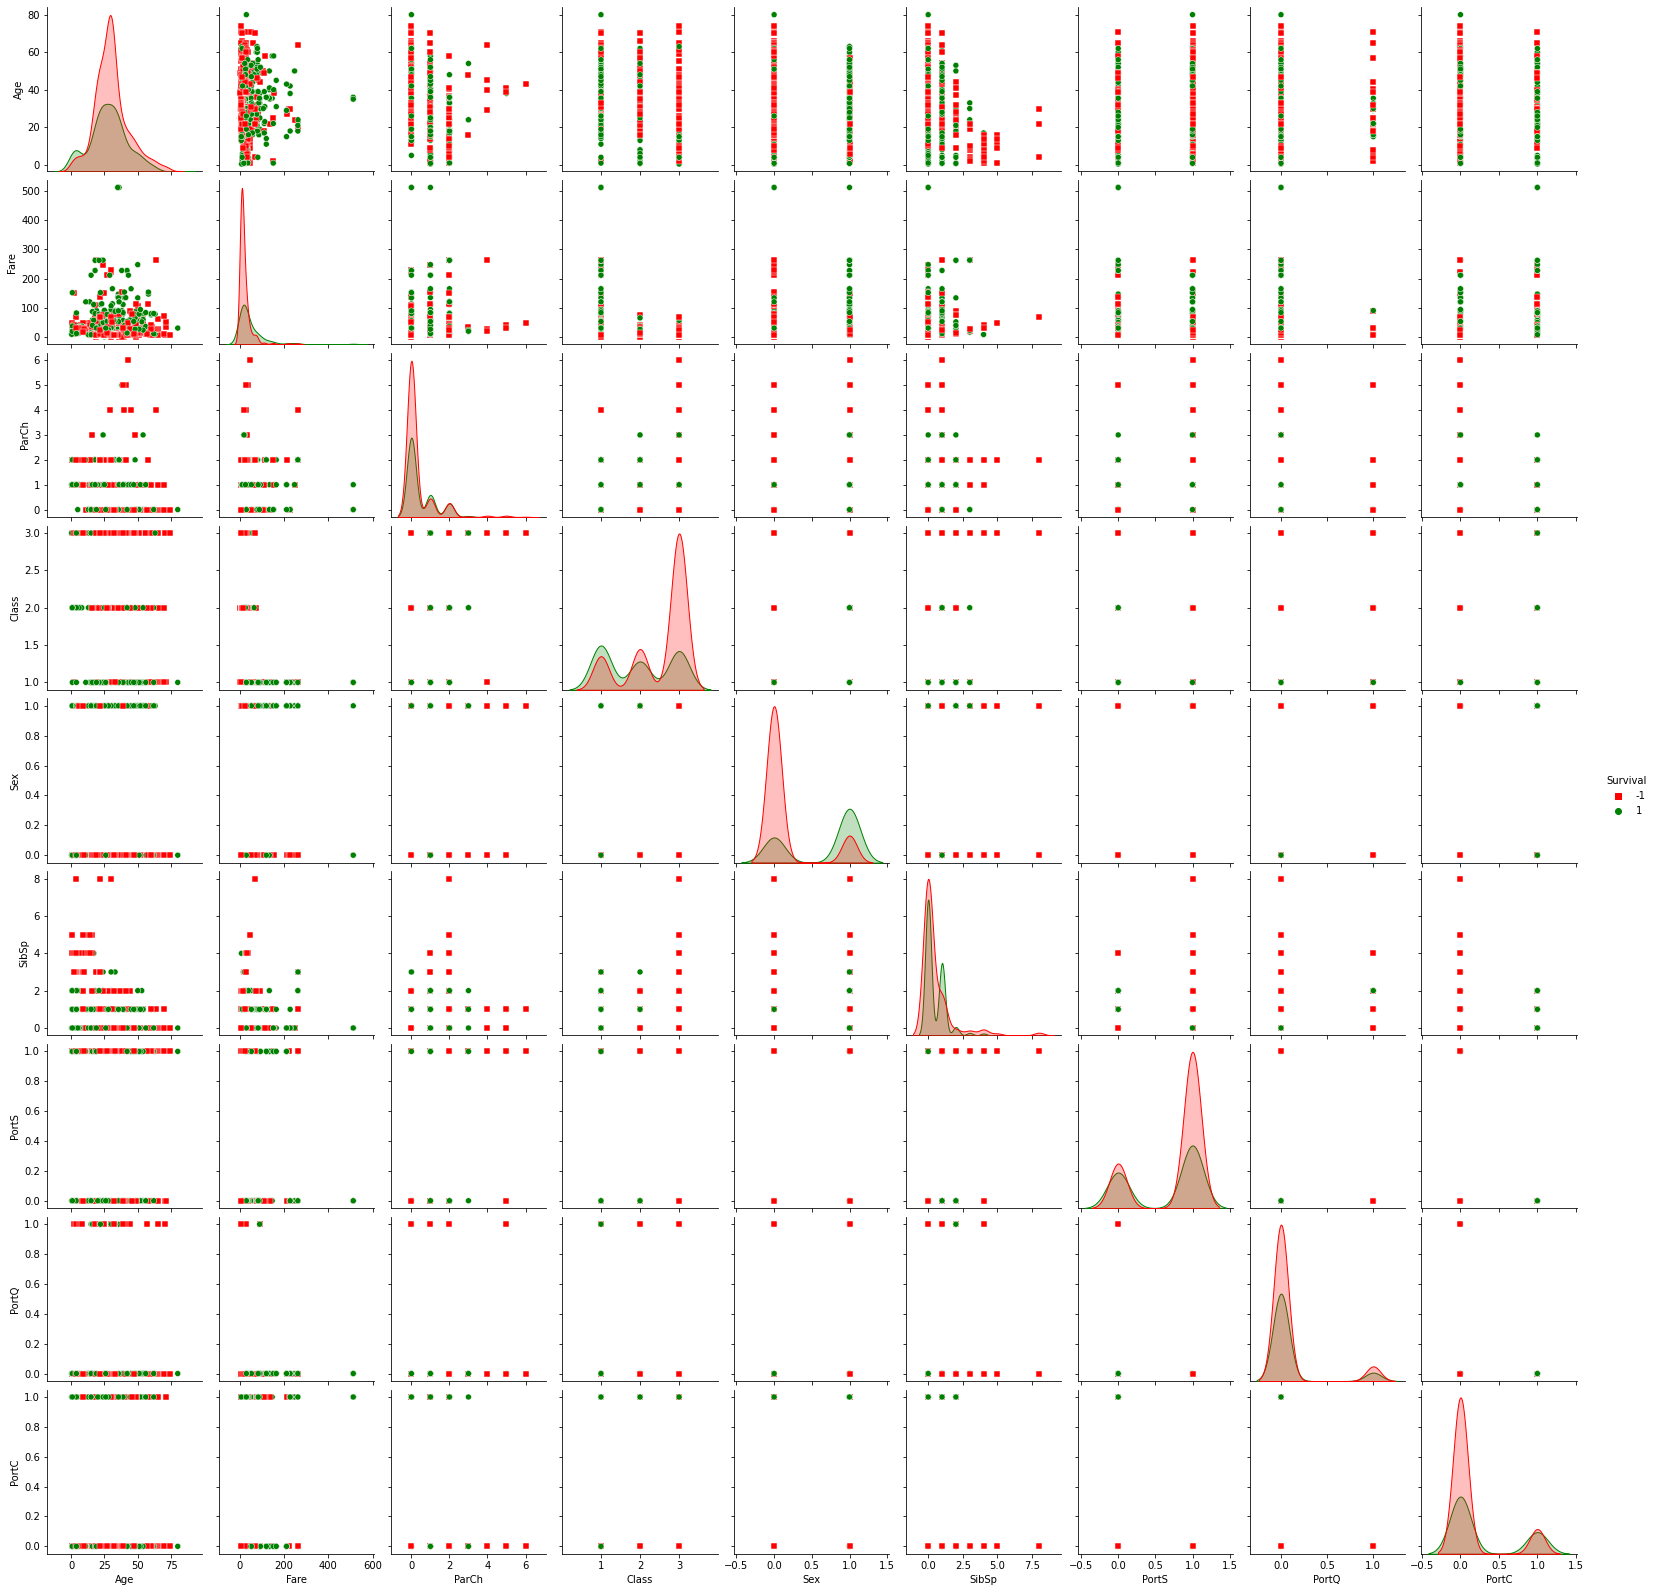

In [10]:
sns.pairplot(titanic_full_data, \
             hue="Survival", \
             markers = ["s", "o"], \
             palette = {-1:"r", 1:"g"},\
            kind = 'scatter')
plt.show()

In the following cell, write code that initialises a polynomial data matrix _data_matrix_ of degree one with the standardised inputs formed from the passenger_class, passenger_sex, passenger_age,  passenger_siblings_spouses, passenger_parents_children, ticket_fare and embarkation_port arrays of the dataset. Define an objective function _objective_ with argument _weights_ based on the **binary_logistic_regression_cost_function** with fixed arguments _data_matrix_ and _survival_. Repeat the same exercise to create a function _gradient_ based on **binary_logistic_regression_gradient**.

In [11]:
data_matrix = polynomial_basis(titanic_full_data.iloc[:, 1:10])

In [12]:
def objective(weights):
    return binary_logistic_regression_cost_function(data_matrix, weights, titanic_full_data['Survival'])        

In [13]:
def gradient(weights):
    return binary_logistic_regression_gradient(data_matrix, weights, titanic_full_data['Survival'])

Call gradient descent with the following cell to compute _optimal_weights_ for your model.

In [14]:
initial_weights = np.zeros(data_matrix.shape[1])
optimal_weights, objective_values = gradient_descent(objective, gradient, initial_weights, \
                                    step_size=3.9/(np.linalg.norm(data_matrix, 2) ** 2), \
                                    no_of_iterations=20000, print_output=2000)

/home/kai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/home/kai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


Iteration 2000/20000, objective = 0.41793878283905167.
Iteration 4000/20000, objective = 0.41910686468375863.
Iteration 6000/20000, objective = 0.4002253087052869.
Iteration 8000/20000, objective = 0.3824638771500269.
Iteration 10000/20000, objective = 0.4202206382016856.
Iteration 12000/20000, objective = 0.4072877320728925.
Iteration 14000/20000, objective = 0.44519308593092277.
Iteration 16000/20000, objective = 0.4880410905133093.
Iteration 18000/20000, objective = 0.5428728663549776.
Iteration 20000/20000, objective = 0.5320343278031375.
Iteration completed after 20000/20000, objective = 0.5320343278031375.


A correct result of your gradient-descent-based logistic regression strategy will be awarded **4 marks**.

In [15]:
print("The optimal weights are w = {w}.T with objective value L(w) = {o}.".format(w = optimal_weights.T, \
        o=objective_values[-1]))

The optimal weights are w = [-9.15705576e-04 -1.18843913e-02  4.96702748e-03 -3.18668340e-04
 -6.85323478e-03  4.75508124e-03 -3.19398963e-03 -1.77743722e-03
  6.46579545e-05  7.97073691e-04].T with objective value L(w) = 0.5320297673828657.


Write two functions **prediction_function** and **classification_accuracy** that turn your predicitons into classification results and that compare how many labels have been classified correctly. The function **prediction_function** takes the arguments _data_matrix_ and _weights_ as inputs and returns a vector of class labels with binary values in $\{-1, 1\}$ as its output. The function **classification_accuracy** takes two inputs _true_labels_ and _recovered_labels_ and returns the percentage of correctly classified labels divided by 100.

In [16]:
def prediction_function(data_matrix, weights):
    class_vector = []
    y_hat = np.dot(data_matrix, weights.T)
    
    for i in y_hat:
        if i < 0:
            class_vector.append(-1)
        elif i > 0:
            class_vector.append(1)
    return class_vector


def classification_accuracy(true_labels, recovered_labels):
    
    y_true = true_labels
    y_pred = recovered_labels
    acc = np.sum(np.equal(y_true,y_pred))/len(y_true)
    return acc

The correct classification accuracy is awarded **4 marks**.

In [17]:
print("The classification accuracy for the training set is {p} %.".format(p = 100 * \
        classification_accuracy(survival, prediction_function(data_matrix, optimal_weights))))

The classification accuracy for the training set is 67.003367003367 %.


Now compare your result with the one produced by calling the _gradient\_descent\_v2_. Call version 2 of the gradient descent with the following cell to compute optimal_weights for your model.

In [18]:
initial_weights = np.zeros(data_matrix.shape[1])
optimal_weights, objective_values = gradient_descent_v2(objective, gradient, initial_weights, \
                                    step_size=3.9/(np.linalg.norm(data_matrix, 2) ** 2), \
                                    no_of_iterations=100000, print_output=2000, tolerance = 1e-5)

/home/kai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/home/kai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


Iteration 2000/100000, objective = 0.41793878283905167.
Iteration completed after 2000/100000, objective = 0.41793878283905167.


In [19]:
print("The optimal weights are w = {w}.T with objective value L(w) = {o}.".format(w = optimal_weights.T, \
        o=objective_values[-1]))

The optimal weights are w = [-3.16878979e-04 -9.60493419e-03  4.02507346e-03 -5.46959283e-05
 -1.26924810e-03  4.25055015e-04 -3.54770567e-04 -3.58171677e-04
 -1.81760614e-05  5.94687589e-05].T with objective value L(w) = 0.4175456897340819.


In [20]:
print("The classification accuracy for the training set is {p} %.".format(p = 100 * \
        classification_accuracy(survival, prediction_function(data_matrix, optimal_weights))))

The classification accuracy for the training set is 66.55443322109988 %.


A correct result of your gradient-descent-based logistic regression strategy with cut-off will be awarded **4 marks**.  The total marks possible in this section are **17 marks**.

## Ridge logistic regression

For the next part, modify the binary logistic regression problem to include a squared norm of the weights vector as a regularisation term, similar to ridge regression where we added a multiple of the squared Euclidean norm of the weights to the mean squared error. Write two functions **ridge_logistic_regression_cost_function** and **ridge_logistic_regression_gradient** that take the arguments _data_matrix_, _weight_vector_, _outputs_ and _regularisation_parameter_ as inputs. The function **ridge_logistic_regression_cost_function** returns the evaluation of the binary logistic regression cost function with its linear model being determined by the polynomial basis matrix _data_matrix_ and the weight vector _weight_vector_, plus _regularisation_parameter_ times the squared norm of _weight_vector_ divided by two. The function **ridge_logistic_regression_gradient** is supposed to compute the corresponding gradient.

In [21]:
def ridge_logistic_regression_cost_function(data_matrix, weights, outputs, regularisation_parameter):
    
    y_hat = np.dot(data_matrix, weights.T)
    y = outputs
    ridge_weights = np.sum(np.dot(weights,weights.T))
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    ridge_loss = loss + regularisation_parameter*ridge_weights
    return ridge_loss
    
def ridge_logistic_regression_gradient(data_matrix, weights, outputs, regularisation_parameter):
    
    X = data_matrix
    y_hat = np.dot(data_matrix, weights.T)
    y = outputs
    ridge_weights = np.sum(np.dot(weights,weights.T))
    m = X.shape[0] #training samples
    gradient = (1/m)*np.dot(X.T, (y_hat - y))
    ridge_gradient = gradient + regularisation_parameter*ridge_weights
    return ridge_gradient

Set your regularisation parameter _regularisation_parameter_ to the value 15 and define an objective function _objective_ as well as a gradient function _gradient_, both with argument _weight_vector_, for fixed _data_matrix_ and _outputs_ as from the titanic dataset that you have used before.

In [22]:
def objective(weights):
    return ridge_logistic_regression_cost_function(data_matrix, weights, titanic_full_data['Survival'], 15)

In [23]:
def gradient(weights):
    return ridge_logistic_regression_gradient(data_matrix, weights, titanic_full_data['Survival'], 15)

Test your solution with the following cell.

In [24]:
regularisation_parameter = 15

In [25]:
initial_weight_vector = np.zeros(data_matrix.shape[1])
ridge_weight_vector, ridge_objective_values = gradient_descent(objective, gradient, initial_weight_vector, \
                                    step_size=3.9/np.linalg.norm(data_matrix.T @ data_matrix + \
                                    regularisation_parameter * np.eye(data_matrix.shape[1]), 2), \
                                    no_of_iterations=20000, print_output=2000)

/home/kai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/kai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


Iteration 2000/20000, objective = 0.41730092688861437.
Iteration 4000/20000, objective = 0.4218743700397015.
Iteration 6000/20000, objective = 0.40309859397243974.
Iteration 8000/20000, objective = 0.38482731609453874.
Iteration 10000/20000, objective = 0.42305957232874997.
Iteration 12000/20000, objective = 0.4093075791330187.
Iteration 14000/20000, objective = 0.44793044032672974.
Iteration 16000/20000, objective = 0.49190795633847745.
Iteration 18000/20000, objective = 0.5703795519293376.
Iteration 20000/20000, objective = 0.5405746066149507.
Iteration completed after 20000/20000, objective = 0.5405746066149507.


The correct classification accuracy is awarded **4 marks**.

In [26]:
print("The ridge regression classification accuracy with regularisation parameter {a}".format(a = \
       regularisation_parameter), "for the titanic training set is {p} %.".format(p = 100 * \
        classification_accuracy(survival, prediction_function(data_matrix, ridge_weight_vector))))

The ridge regression classification accuracy with regularisation parameter 15 for the titanic training set is 67.003367003367 %.


**K-fold validation and optimisation of hyperparameters**

This is the last part of the binary classification part of the final assessment. In this part you will be asked 
to perform a grid search to optimise the classification accuracy of ridge binary logistic regression over the value of a hyperparameter _regularisation\_parameter_. You are also asked to perform a K-fold cross validation when calculating the classification accuracy.

As a first exercise you are asked to implement a  K -fold cross validation strategy as introduced in the lectures. Write a function  **data_split** that takes arguments _data\_matrix_, _outputs_  and  _chunks\_number_  and splits the data randomly into  K = _chunks\_number_ equal (or almost equal) chunks.

In [48]:
def data_split(data_matrix, outputs, chunks_number):
    for i in range(0, len(outputs), chunks_number):
        yield outputs[i:1 + chunks_number]
    K = list(data_split[chunks_number])    
    return K, outputs

Below you are given a function **K_fold_validation_error**  that takes arguments  _data\_matrix_ ,  _outputs_ ,  _regularisation\_parameter_ , _chunks\_number_, and using the functions previously defined
- splits the data into  _chunks\_number_  chunks;
- uses  K-1  chunks to compute the ridge regression weights  and the remaining set as the validation set  $S_v$  for the calculation of classification accuracy;
- repeats the procedure for all choices of $K-1$ chunks combinations, and averages the result;
- returns the average _average\_weights_ and the corresponding _classiffication\_accuracy_.

In [49]:
def K_fold_validation_error(data_matrix, outputs, regularisation_parameter,chunks_number):
    
    splited_data, splited_outputs = data_split(data_matrix, outputs, chunks_number)
    
    average_weights = np.zeros(data_matrix.shape[1])
    
    for validation_chunk in range(chunks_number):
        
        validation_data = splited_data[validation_chunk]
        validation_ouputs = splited_outputs[validation_chunk]
        
        training_data = np.concatenate([splited_data[i] for i in range(chunks_number) if i!=validation_chunk], axis = 0)
        training_output = np.concatenate ([splited_outputs[i] for i in range(chunks_number) if i!=validation_chunk], axis = 0)
        
        objective = lambda weights: \
            ridge_logistic_regression_cost_function (training_data, weights, training_output, regularisation_parameter)
        gradient = lambda weights: \
            ridge_logistic_regression_gradient (training_data, weights, training_output, regularisation_parameter)
        
        initial_weight_vector = np.zeros(training_data.shape[1])
        ridge_weight_vector, ridge_objective_values = gradient_descent_v2(objective, gradient, initial_weight_vector, \
                                    step_size=3.9/np.linalg.norm(training_data.T @ training_data + \
                                    regularisation_parameter * np.eye(training_data.shape[1]), 2), \
                                    no_of_iterations=10000, print_output=1001, tolerance = 1e-5)
        
        average_weights += ridge_weight_vector
    
    average_weights /= chunks_number
    ridge_classification_accuracy = classification_accuracy(validation_ouputs, prediction_function(validation_data, average_weights))
    
    return average_weights, ridge_classification_accuracy

Using the **K_fold_validation_error** function analyse the behaviour of the classification error as a function of _regularisation\_parameter_. Consider the integer grid _[0,1,2,3,4,5,6,7,8,9,10]_, evaluate the classification error (using the K-fold cross validation method with K = 5) for all points of the grid and find such a value of regularisation parameter that maximises the classication accuracy on the grid.

In [50]:
data_matrix = polynomial_basis(titanic_full_data.iloc[:, 1:10])
outputs = titanic_full_data['Survival']

int_grid = [0,1,2,3,4,5,6,7,8,9,10]
classification_accuracy_grid = []

for i in int_grid:
    average_weights, ridge_classification_accuracy = K_fold_validation_error(data_matrix, outputs, i, 5)
    classification_accuracy_grid.append(ridge_classification_accuracy)

ValueError: too many values to unpack (expected 2)

The correct classification accuracy is awarded **6 marks**. The total marks possible in this section are **10 marks**.

In [94]:
max_classification_accuracy = np.argmax(classification_accuracy_grid)
print("The classification accuracy of a ridge binary classification is maximised for regularisation parameter a  = {a}".\
      format(a = alpha_grid[max_classification_accuracy]), "and is equal to {p} %.".\
      format(p = 100* classification_accuracy_grid[max_classification_accuracy]))

NameError: name 'alpha_grid' is not defined

## Multinomial logistic regression

This concludes the binary classification part of the first part of the final assessment. We now move on to multinomial logistic regression for multi-class classfication problems. As a first exercise, implement the softmax function **softmax_function** as defined in the lectures. The function takes the NumPy array _argument_ as its main argument, but also has an optional _axis_ argument to determine across which array-dimension you apply the softmax operation. If this argument is not specified (or set to _None_), then the softmax operation is applied to the entire array. Make sure your function works at least for NumPy arrays _argument_ with arbitrary numerical values and dimension one or two.

In [52]:
from numpy import exp
def softmax_function(argument, axis=None):
    e = exp(argument)
    return e / e.sum()

Test your softmax function with the following cell. Passing this test is awarded with **4 marks**.

In [ ]:
argument = np.array([[1.5], [0.3], [-3.7]])
print("The softmax of {arg}.T is {out}.T.".format(arg=argument.T, out=softmax_function(argument).T))
assert_array_almost_equal(softmax_function(np.array([[1.5], [0.3], [-3.7]])), np.array([[0.76528029], \
                                                        [0.23049799], [0.00422172]]))
assert_array_almost_equal(softmax_function(np.array([[1.5, 3], [0.3, -0.7], [-3.7, 2]]), axis=0), \
                          np.array([[0.76528029, 0.71807976], [0.23049799, 0.01775346], \
                                    [0.00422172, 0.26416678]]))

Next, write a function **one_hot_vector_encoding** that converts an NumPy array _labels_ with values in the range of $\{0, K - 1\}$ into so-called one-hot vector encodings. For example, for $K = 3$ and a label vector $\text{labels} = \left( \begin{matrix} 2 & 0 & 1 & 2\end{matrix} \right)^\top$, the output of **one_hot_vector_encoding(labels)** should be a two-dimensional NumPy array of the form

\begin{align*}
\left( \begin{matrix} 0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{matrix} \right) \, . 
\end{align*}

In [56]:
from numpy import argmax
def one_hot_vector_encoding(labels):
    alphabet = labels
    char_to_int = dict((c, i) for i, c in enumerate(alphabet))
    int_to_char = dict((i, c) for i, c in enumerate(alphabet))
    integer_encoded = [char_to_int[char] for char in data]
    onehot_encoded = list()
    for value in integer_encoded:
        letter = [0 for _ in range(len(alphabet))]
        letter[value] = 1
        onehot_encoded.append(letter)
    inverted = int_to_char[argmax(onehot_encoded[0])]
    return inverted

Test your _one\_hot\_vector\_encoding_ function with the following cell. Passing this test is awarded with **1 mark**.

In [57]:
assert_array_almost_equal(one_hot_vector_encoding(np.array([1, 2, 0, 3])), \
                          np.array([[0,1,0,0],[0,0,1,0],[1,0,0,0],[0,0,0,1]]))
assert_array_almost_equal(one_hot_vector_encoding(np.array([1,0,1,0])), \
                          np.array([[0,1],[1,0],[0,1],[1,0]]))

TypeError: unhashable type: 'numpy.ndarray'

Implement the cost function and gradient for the multinomial logistic regression in terms of two functions **multinomial_logistic_regression_cost_function** and **multinomial_logistic_regression_gradient**. As in the binary classification case, the arguments are the polynomial data matrix _data_matrix_ and weights that are now named _weight_matrix_. Instead of passing on labels as _outputs_ as in the binary case, you pass the one hot vector encoding representation _one_hot_vector_encodings_ as your third argument. Return the cost function value, respectively the gradient, following the mathematical formulas in the lecture notes.

In [ ]:
def multinomial_logistic_regression_cost_function(data_matrix, weight_matrix, one_hot_vector_encodings):
    argument = one_hot_vector_encoding(labels)
    probabilities = softmax_function(argument, axis=None)
    predictions = np.array([np.argmax(i) for i in probabilities]) #returns the outcome with max probability
    return probabilities, predictions
    
def hypothesis(weight_matrix, data_matrix):
    z = np.dot(weight_matrix, data_matrix)
    return 1/(1+np.exp(-(z)))

def multinomial_logistic_regression_gradient(data_matrix, weight_matrix, one_hot_vector_encodings):
    m = weight_matrix.shape[0]
    y1 = hypothesis(weight_matrix, data_matrix)
    return (1/m) * np.dot(weight_matrix.T, y1 - one_hot_vector_encodings)

Test your implementation on the [glass dataset](https://archive.ics.uci.edu/ml/datasets/glass+identification); the dataset contains 9 attributes of 214 examples of glass that could belong to one of 7 classes. For more information on the dataset visit [this link](https://archive.ics.uci.edu/ml/datasets/glass+identification). The code in the following cell loads the dataset and stores the labels in a NumPy array _labels_ and the attributes in a NumPy array _inputs_.

In [ ]:
from data_loader import load_glass_data
inputs, labels = load_glass_data()

Transform the labels _labels_ into a one hot vector representation with your function **one_hot_vector_encoding** and store your results in a NumPy array named _outputs_.

In [ ]:
bridge_df = pd.DataFrame(titanic_full_data, columns=['Survival',
                           'Age',
                           'Fare',
                           'ParCh',
                           'Class',
                           'Sex', 
                           'SibSp',
                           'PortS',
                           'PortQ',
                           'PortC']
# generate binary values using get_dummies
dum_df = pd.get_dummies(bridge_df, columns=['Survival',
                           'Age',
                           'Fare',
                           'ParCh',
                           'Class',
                           'Sex', 
                           'SibSp',
                           'PortS',
                           'PortQ',
                           'PortC'], prefix=["Type_is"] )
# merge with main df bridge_df on key values
bridge_df = bridge_df.join(dum_df)
bridge_df

Call gradient descent with the following cell to compute an _optimal_weight_matrix_ for your model.

In [ ]:
initial_weight_matrix = np.zeros((data_matrix.shape[1], outputs.shape[1]))
optimal_weight_matrix, objective_values = gradient_descent(objective, gradient, initial_weight_matrix, \
                                    step_size=3.9/(np.linalg.norm(data_matrix, 2) ** 2), \
                                    no_of_iterations=100000, print_output=5000)

Write a function **multinomial_prediction_function** that turns your predicitons into labels. The function takes the arguments _data_matrix_ and _weight_matrix_ as inputs and returns a vector of labels with values in $\{0, K - 1 \}$ as its output.

In [ ]:
def multinomial_prediction_function(data_matrix, weight_matrix):
    data_matrix, weight_matrix = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
    # fit final model
    model = LogisticRegression()
    model.fit(X, y)
    # new instances where we do not know the answer
    Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
    # make a prediction
    ynew = model.predict_proba(Xnew)
    # show the inputs and predicted probabilities
    for i in range(len(Xnew)):
        print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))
    return Xnew[i], ynew[i]

The correct classification accuracy is awarded **4 marks**.

In [ ]:
print("The classification accuracy for the glass dataset is {p} %.".format(p = 100 * \
        classification_accuracy(labels, multinomial_prediction_function(data_matrix, optimal_weight_matrix))))

**Two layers neural network for multiclass classification**

In the last part of this section you are asked to improve the classification accuracy of multinomial logistic regression by considering a convolutional neural network with $L = 2$ layers. All layers have the same activation function which is given by a softmax function applied to an affine-linear transformation. Namely, we define
\begin{equation*}
\left\{
\begin{array}{ll}
Z^{(\ell)} &=  \widetilde{X}^{(\ell-1)}W^{(\ell)},\\
X^{(\ell)} &=  \mathrm{softmax}\left(Z^{(\ell)}\right)
\end{array}
\right.,
\label{eq:nn_model} \tag{1}
\end{equation*}
for $\ell=1,\ldots,L$, where $X^{(0)}$ is a mathematical representation of _inputs_ and tilde is introduced to denote an augmented matrix, i.e. the one with artificial column of ones inserted at the beginning of a matrix. In the above weight matrices $W^{(\ell)}$ have dimensions $\left( d_{\ell} + 1 \right)\times d_{\ell+1}$ with $d_1 =d_2=\ldots=d_L = d$ and $d_{L+1} = K$, with $K$ being a number of class labels in the original classification problem. 

Let $\mathbf{W} = \left\{W^{(\ell)}\right\}_{\ell = 1}^L$ be a full set of parameters defining the model. Your task in this section is to find an optimal values of parameters $\mathbf{W}$ such that the cost function
$$
L\left(\mathbf{W}\right) = 
\sum\limits_{i=1}^s \log\left(\sum\limits_{j=1}^K
\mathrm{e}^{Z^{(L)}_{i,j}}\right)
-
\sum\limits_{i=1}^s\sum\limits_{j=1}^K
\mathbf{1}_{y_i = j} Z^{(L)}_{i,j}.
$$
is minimised.

The optimisation problem is set to be solved by using the gradient descent method. This involves a backpropagation approach to a calculation of the gradient $\frac{\mathrm{d}L\left(\mathbf{W}\right)}{\mathrm{d}\mathbf{W}}$ (see lecture notes). To help you with the problem, we provide a series of results on an interconnection between different derivatives. Every derivative here is thought as a gradient and is written in the form of a corresponding size matrix. For example,
the derivative $\frac{\mathrm{d}L\left(\mathbf{W}\right)}{\mathrm{d}W^{(1)}}$ should be thought as a gradient of the cost function $L\left(\mathbf{W}\right)$ with respect to the arguments $W^{(1)}_{i,j}$ that is written as a matrix of size $\left(d+1\right)\times d$. In what follows, we denote a matrix $M$ with the first row removed as $\widehat{M}$ and also write $\mathrm{OHV}$ for a one hot vector representation of input data.
$$
\boxed{
\begin{array}{rcl}
\frac{\mathrm{d}L\left(\mathbf{W}\right)}{\mathrm{d} Z^{(\ell)}}&=& 
\begin{cases}
\mathrm{softmax}\left(Z^{(L)}\right) - 
\mathrm{OHV},& \ell = L,\\
X^{(\ell)}\odot\left[
\frac{\mathrm{d}L\left(\mathbf{W}\right)}{\mathrm{d} X^{(\ell)}}
- \Sigma\left(X^{(\ell)}\odot
\frac{\mathrm{d}L\left(\mathbf{W}\right)}{\mathrm{d} X^{(\ell)}} \right)
\right]
,& \ell < L
\end{cases}
\\
\frac{\mathrm{d}L\left(\mathbf{W}\right)}{\mathrm{d} X^{(\ell)}} &=& \frac{\mathrm{d}L\left(\mathbf{W}\right)}{\mathrm{d} Z^{(\ell+1)}}\cdot \left(\widehat{W}^{(l+1)}\right)^{\top}
\\
\frac{\mathrm{d}L\left(\mathbf{W}\right)}{\mathrm{d} W^{(\ell)}} &=& 
\left(\widetilde{X}^{(\ell-1)}\right)^{\top}\cdot
\frac{\mathrm{d}L\left(\mathbf{W}\right)}{\mathrm{d} Z^{(\ell)}}
\end{array}
},
$$
where for any matrix $M$ we define $\Sigma\left(M\right)$ as a matrix of the same dimensions as $M$ but with every matrix element swapped with a row-sum of matrix elements of matrix $M$.

Your first task would be to implement the cost function and the gradient in terms of two functions **nn\_multinomial\_logistic\_regression\_cost\_function** and **nn\_multinomial\_logistic\_regression\_gradient**. 
Unlikely to the case of a simple multinomial classification, we can not evaluate the cost function and the gradient straightaway. Therefore you first need to implement a function that evaluates the values of variables $X^{(\ell)}$ and $Z^{(\ell)}$ on all hidden layers $\ell = 1,\ldots,L$. Define a function **nn\_model\_evaluation** with arguments _data\_matrix_, _weight\_matrix_ that evaluates and returns a numpy array of the model values on all hidden layers. (see (1))

In [ ]:
def nn_model_evaluation(data_matrix, weight_matrix):
    accuracy = model.evaluate(X, y)
    print('Accuracy: %.2f' % (accuracy*100))
    return accuracy

Now we are ready to implement the cost function and the gradient in terms of two functions **nn\_multinomial\_logistic\_regression\_cost\_function** and **nn\_multinomial\_logistic\_regression\_gradient**. The functions should have the same arguments and output as the ones used in simple multinomial classification.

In [ ]:
def nn_multinomial_logistic_regression_cost_function(data_matrix, weight_matrix, one_hot_vector_encodings):
    argument = one_hot_vector_encoding(labels)
    probabilities = softmax_function(argument, axis=None)
    predictions = np.array([np.argmax(i) for i in probabilities]) #returns the outcome with max probability
    return probabilities, predictions
    
def hypothesis(weight_matrix, data_matrix):
    z = np.dot(weight_matrix, data_matrix)
    return 1/(1+np.exp(-(z)))
    
def nn_multinomial_logistic_regression_gradient(data_matrix, weight_matrix, one_hot_vector_encodings):
    def multinomial_logistic_regression_gradient(data_matrix, weight_matrix, one_hot_vector_encodings):
    m = weight_matrix.shape[0]
    y1 = hypothesis(weight_matrix, data_matrix)
    return (1/m) * np.dot(weight_matrix.T, y1 - one_hot_vector_encodings)

In the following cell, write code that initialises a data matrix _data_matrix_ with the standardised inputs _inputs_ from the glass dataset. Define an objective function _objective_ with argument _weight_matrix_ based on the **nn\_multinomial_logistic_regression_cost_function** with fixed arguments _data_matrix_ and _one_hot_vector_encodings_. Repeat the same exercise to create a function _gradient_ based on **nn\_multinomial_logistic_regression_gradient**.

In [ ]:
_bridge_df = pd.DataFrame(titanic_full_data, columns=['Survival',
                           'Age',
                           'Fare',
                           'ParCh',
                           'Class',
                           'Sex', 
                           'SibSp',
                           'PortS',
                           'PortQ',
                           'PortC']
# generate binary values using get_dummies
_dum_df = pd.get_dummies(_bridge_df, columns=['Survival',
                           'Age',
                           'Fare',
                           'ParCh',
                           'Class',
                           'Sex', 
                           'SibSp',
                           'PortS',
                           'PortQ',
                           'PortC'], prefix=["Type_is"] )
# merge with main df bridge_df on key values
_bridge_df = _bridge_df.join(dum_df)
_bridge_df

Call gradient descent with the following cell to compute an _optimal_weight_matrix_ for your model.

In [ ]:
layers_number = 2
initial_weight_matrix = np.empty(layers_number, dtype = np.ndarray)
for weight_pos in range(layers_number):
    if (weight_pos < layers_number-1):        
        initial_weight_matrix[weight_pos] = np.zeros((data_matrix.shape[1]+1,inputs.shape[1]))
        np.fill_diagonal(initial_weight_matrix[weight_pos],1)
    else:
        initial_weight_matrix[weight_pos] = np.zeros((data_matrix.shape[1]+1,outputs.shape[1]))
            
optimal_weight_matrix, objective_values = gradient_descent(objective, gradient, initial_weight_matrix, \
                                    step_size=3.9/(np.linalg.norm(data_matrix, 2) ** 2), \
                                    no_of_iterations=10000, print_output=100001)

Write a function **nn\_multinomial_prediction_function** that turns your predicitons into labels. The function takes the arguments _data_matrix_ and _weight_matrix_ as inputs and returns a vector of labels with values in $\{0, K - 1 \}$ as its output.

In [ ]:
def _sigmoid(x):
        return 1 / (1 + np.exp(-x))

def nn_multinomial_prediction_function(data_matrix, weight_matrix):
    layer_1 = np.dot(data_matrix, weight_matrix) + bias
    layer_2 = ._sigmoid(layer_1)
    prediction = layer_2
    return prediction

The correct classification accuracy is awarded **4 marks**. The total number of possible marks in this section is **13 marks**.

In [ ]:
print("The classification accuracy for the glass training set is {p} %.".format(p = 100 * \
        classification_accuracy(labels, nn_multinomial_prediction_function(data_matrix, optimal_weight_matrix))))

The total number of possible marks in the first part is **40 marks**.